In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

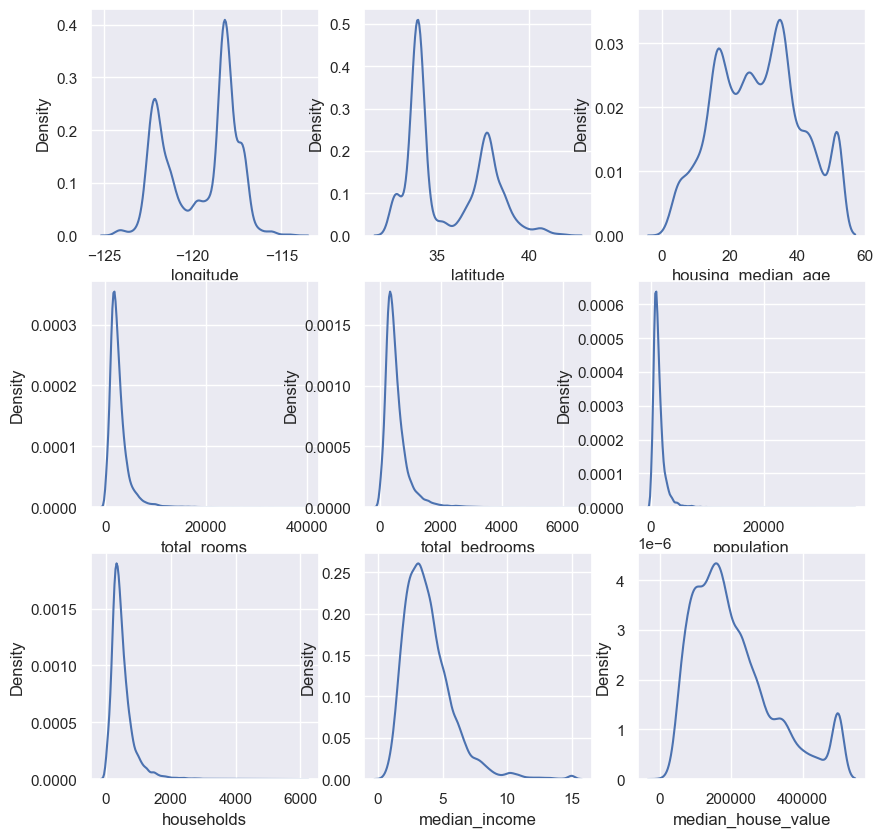

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10,10))
cols = df.columns[:-1]
counter = 0
for i in range(3):
    for j in range(3):
        _ = sns.kdeplot(df[cols[counter]], ax=ax[i][j])
        counter += 1

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

<li>'latitude',
<li>'longitude',
<li>'housing_median_age',
<li>'total_rooms',
<li>'total_bedrooms',
<li>'population',
<li>'households',
<li>'median_income',
<li>'median_house_value'

In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
full_df = df.copy()
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].iloc[:, :-1].copy()
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8782,-118.32,33.80,29.0,4317.0,1037.0,2102.0,959.0,3.1275,286400.0
17636,-121.92,37.27,29.0,5536.0,862.0,2651.0,881.0,5.6358,282100.0
8349,-118.33,33.94,31.0,3757.0,1102.0,3288.0,964.0,1.9309,137500.0
12887,-121.34,38.66,18.0,4164.0,963.0,2032.0,898.0,2.1190,133100.0
4455,-118.17,34.09,45.0,1327.0,271.0,1069.0,284.0,3.3977,153800.0


##### Question 1<br>
There's one feature with missing values. What is it?

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

##### Question 2<br>
What's the median (50% percentile) for variable 'population'?

In [10]:
df.population.median()

1195.0

##### Question 3<br>
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>

In [11]:
def train_test_val_split(df, y_col, random_seed, split=[0.6, 0.2, 0.2]):
    """
    function to split datafrmae into train, test and validation
    
    :df: dataframe to work with
    :y_col: target variable column name
    :random_seed: seed for numpy
    :split: list with train size, test size, and val size in %

    :return: x_train, y_train, x_test, y_test, x_val, y_val
    """
    total = df.shape[0]
    n_test = int(total * split[1])
    n_val = int(total * split[2])
    # to avoid missing data
    n_train = total - n_val - n_test

    # shuffling the indices
    idx = np.arange(total)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_train.reset_index(drop=True, inplace=True)
    df_test= df.iloc[idx[n_train:n_train+n_test]].copy()
    df_test.reset_index(drop=True, inplace=True)
    df_val = df.iloc[idx[n_train+n_test:]].copy()
    df_val.reset_index(drop=True, inplace=True)

    x_cols = df.columns[df.columns!=y_col]

    X_train, y_train = df_train[x_cols].copy(), df_train[y_col].copy()
    X_test, y_test = df_test[x_cols].copy(), df_test[y_col].copy()
    X_val, y_val = df_val[x_cols].copy(), df_val[y_col].copy()

    return X_train, y_train, X_test, y_test, X_val, y_val

In [12]:
original_value = df.median_house_value.copy()
df['median_house_value'] = np.log1p(df.median_house_value)

In [13]:
# NAs are replaced with 0s
X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(df, 'median_house_value', random_seed=42, split=[0.6, 0.2, 0.2])
X_train.total_bedrooms.fillna(0, inplace=True)
X_test.total_bedrooms.fillna(0, inplace=True)
X_val.total_bedrooms.fillna(0, inplace=True)

In [14]:
def linear_regression_train(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(XT).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [15]:
w0, w = linear_regression_train(X_train, y_train)
y_pred = w0 + X_test.dot(w)

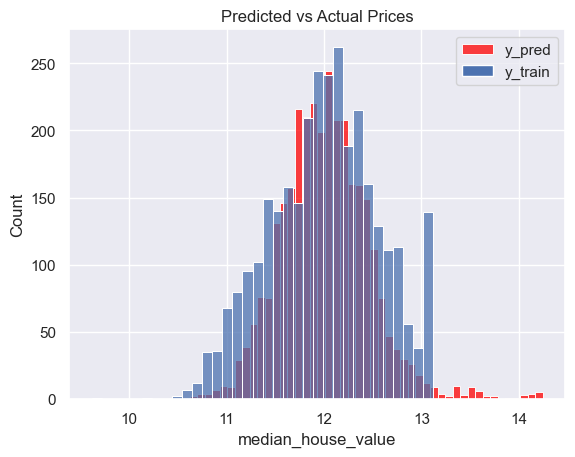

In [16]:
_ = sns.histplot(y_pred, color='red')
_ = sns.histplot(y_val)
plt.title('Predicted vs Actual Prices')
plt.legend(['y_pred', 'y_train'])
plt.show()

In [17]:
def rmse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
round(rmse(y_val, y_pred), 2)

0.73

In [19]:
# NAs are replaced with mean
X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(df, 'median_house_value', random_seed=42, split=[0.6, 0.2, 0.2])
mean_train = X_train.total_bedrooms.mean()
X_train.total_bedrooms.fillna(mean_train, inplace=True)
X_test.total_bedrooms.fillna(mean_train, inplace=True)
X_val.total_bedrooms.fillna(mean_train, inplace=True)

In [20]:
w0, w = linear_regression_train(X_train, y_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

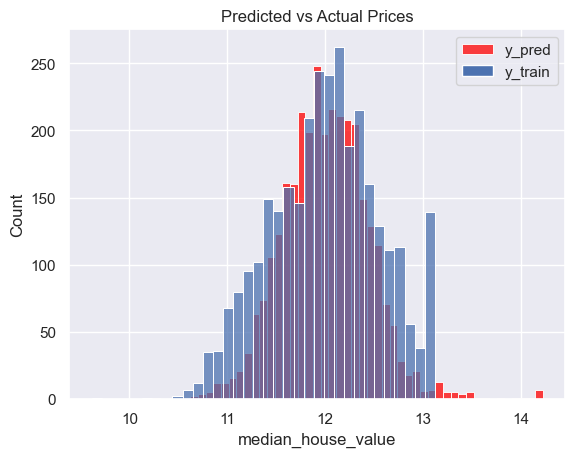

In [21]:
_ = sns.histplot(y_pred, color='red')
_ = sns.histplot(y_val)
plt.title('Predicted vs Actual Prices')
plt.legend(['y_pred', 'y_train'])
plt.show()

##### Question 4<br>
Now let's train a regularized linear regression.<br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>

In [22]:
X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(df, 'median_house_value', random_seed=42, split=[0.6, 0.2, 0.2])
X_train.total_bedrooms.fillna(0, inplace=True)
X_test.total_bedrooms.fillna(0, inplace=True)
X_val.total_bedrooms.fillna(0, inplace=True)

In [23]:
def linear_regression_train_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X)
    XTX = XTX + r * np.identity(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(XT).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [24]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
results = {}
for r in r_values:
    w0, w = linear_regression_train_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    results[r] = round(rmse(y_val, y_pred), 2)

results

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

##### Question 5<br>
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.<br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>

In [25]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = {}
for seed in seeds:
    X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(
        df, 'median_house_value', random_seed=seed, split=[0.6, 0.2, 0.2])
    X_train.total_bedrooms.fillna(0, inplace=True)
    X_val.total_bedrooms.fillna(0, inplace=True)

    w0, w = linear_regression_train(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    scores[seed] = rmse(y_val, y_pred)

In [26]:
np.std([round(i, 1) for i in scores.values()])

0.040000000000000015

In [27]:
np.std([i for i in scores.values()])

0.007489203488570285

##### Question 6<br>
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>

In [28]:
X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(df, 'median_house_value', random_seed=9, split=[0.6, 0.2, 0.2])
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
X_train_val.total_bedrooms.fillna(0, inplace=True)
X_test.total_bedrooms.fillna(0, inplace=True)

w0, w = linear_regression_train_reg(X_train_val, y_train_val, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.3343702375445301